In [6]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Task 1: Change image channel ordering
Write a function that takes image as an input and change the channel ordering and return a new image. Note that cv2.imread() reads the image with **BGR**, not RGB.


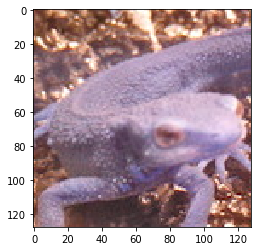

In [27]:
# Original image
img = cv2.imread('imori.jpg')
plt.imshow(img)

In [28]:
# Define BGR2RGB
def BGR2RGB(img):
    blue = img[:, :, 0].copy()
    green = img[:, :, 1].copy()
    red = img[:, :, 2].copy()

    img[:, :, 0] = red
    img[:, :, 1] = green 
    img[:, :, 2] = blue
    
    return img

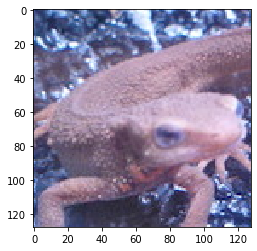

In [29]:
# Show result
plt.imshow(BGR2RGB(img))

# Task 2: Convert color image to grayscale
Write a function that converts color image to grayscale. Formula is given as follows:

Y = 0.2126 R + 0.7152 G + 0.0722 B

In [17]:
def RGB2GRAY(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = 0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]
    return img_gray

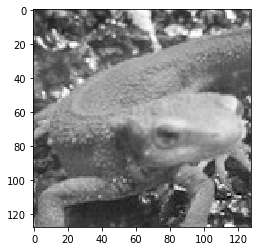

In [19]:
img = cv2.imread('imori.jpg')
img = BGR2RGB(img)
plt.imshow(RGB2GRAY(img), cmap='gray')

# Task 3: Image binarization
Write a function that converts grayscale image to binary (set threshold to 128).

In [35]:
def binarize(img, th):
    img_binary = np.where(img < th, 0, 255)
    return img_binary

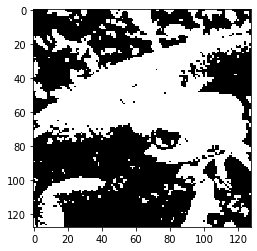

In [36]:
img = cv2.imread('imori.jpg')
img = BGR2RGB(img)
img_gray = RGB2GRAY(img)
img_binary = binarize(img_gray, 128)
plt.imshow(img_binary, cmap="gray")

# Task 4: Otsu thresholding (binarization)
Otsu’s method is an adaptive thresholding way for binarization in image processing. By going through all possible threshold values (from 0 to 255), it can find the optimal threshold value of input image.

## 1. Create histogram for the input image

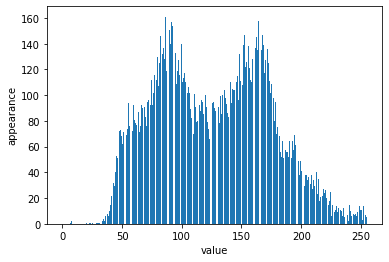

In [37]:
img = cv2.imread('imori.jpg')
img = BGR2RGB(img)
img_gray = RGB2GRAY(img)
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()

## 2. Calculate within-class variance & between-class variance


In [74]:
def otsu_binarization(img):
    max_sigma = 0
    max_t = 0
    out = RGB2GRAY(img)
    H, W = out.shape
    
    # determine threshold
    for _t in range(1, 256):
        v0 = out[out < _t]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        w0 = len(v0) 
        v1 = out[out >= _t]
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w1 = len(v1) 
        sigma = w0 * w1 * ((m0 - m1) ** 2)
        if sigma > max_sigma:
            max_sigma = sigma
            max_t = _t

    # Binarization
    print("threshold >>", max_t)
    th = max_t
    out[out < th] = 0
    out[out >= th] = 255

    return out

In [75]:
img = cv2.imread('imori.jpg')
thresh = otsu_binarization(img)
print(thresh)

threshold >> 127
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 255. 255.   0.]
 [  0.   0.   0. ... 255. 255.   0.]
 ...
 [255.   0.   0. ...   0.   0.   0.]
 [255.   0.   0. ...   0.   0.   0.]
 [255. 255.   0. ...   0.   0.   0.]]


## Task 5: HSV transformation
Write a function that takes color image as input and returns new HSV image

In [76]:
def RGB2HSV(img):
    img = img / 255. 
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-76-4b4b461d8763>, line 1)